In [1]:
# Import necessary functions from the scripts folder
import sys
sys.path.append('../scripts')  # Appending the path to access the scripts folder
from functions import *  # Import all functions from functions.py

# 1. Connect to the database
conn = connect_to_db(dbname="telecom", user="postgres", password="root", host="localhost")
query = "SELECT * FROM xdr_data;"  # Query to select all data from the table
df = load_data(query, conn)  # Load the data into a pandas DataFrame
df.head()  # Display the first few rows of the data


c:\Users\Toshiba\Documents\Kifiya\week 2\notebooks\../scripts\functions.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [2]:
# 2. Clean the data
df = clean_data(df)  # Clean the data by handling missing values, duplicates, and outliers
df.head()  # Show the cleaned data


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
91,1.311448e+19,4/22/2019 4:54,212.0,4/25/2019 2:22,171.0,250086.0,2.082017e+14,3.365014e+10,3.594851e+13,D73529C,...,18520035.0,6001108.0,80876.0,14653925.0,361838774.0,10929307.0,476328079.0,6950131.0,41312557.0,384800771.0
92,1.311448e+19,4/22/2019 5:18,467.0,4/25/2019 0:56,829.0,243504.0,2.082018e+14,3.368542e+10,3.556251e+13,D92937B,...,17400892.0,14644405.0,7682779.0,20806551.0,519620584.0,2710989.0,318297673.0,3820483.0,43336429.0,556406594.0
93,1.311448e+19,4/22/2019 6:18,641.0,4/25/2019 0:01,444.0,236570.0,2.082021e+14,3.366132e+10,3.530731e+13,D73605A,...,19431593.0,16964908.0,11758420.0,9907089.0,715350506.0,10250922.0,290582586.0,1716480.0,40719212.0,757526492.0
95,1.311448e+19,4/22/2019 7:38,804.0,4/25/2019 0:01,199.0,231780.0,2.082017e+14,3.361513e+10,3.520031e+13,L73684B,...,7438887.0,13154981.0,753238.0,9887128.0,124180544.0,14967821.0,350039548.0,14932623.0,53052136.0,139043208.0
97,7.349883e+18,4/22/2019 8:00,810.0,4/25/2019 2:22,294.0,238915.0,2.082010e+14,3.366403e+10,3.586111e+13,D73605A,...,23039020.0,21457678.0,1114842.0,13958301.0,516508263.0,8432981.0,624397048.0,9207067.0,57680454.0,546747900.0


In [3]:
# 3. Analyze the top 10 handsets
top_handsets_df = top_handsets(df)  # Get the top 10 handsets by usage
top_handsets_df  # Display the top 10 handsets


,Handset Type,IMEI
0,Apple iPhone 6S (A1688),5718
1,Apple iPhone 6 (A1586),5195
2,Apple iPhone 7 (A1778),3451
3,Apple iPhone Se (A1723),3304
4,undefined,3234
5,Apple iPhone 8 (A1905),2892
6,Apple iPhone Xr (A2105),2513
7,Samsung Galaxy S8 (Sm-G950F),2204
8,Apple iPhone X (A1901),2111
9,Samsung Galaxy A5 Sm-A520F,2077


In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 4. Visualize the top 10 handsets
top_handsets = df['Handset Model'].value_counts().nlargest(10)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_handsets.values, y=top_handsets.index)
    plt.title('Top 10 Handsets Used by Customers')
    plt.xlabel('Usage Count')
    plt.ylabel('Handset Model')
    plt.show()

IndentationError: unexpected indent (2172346091.py, line 8)

In [5]:
# 5. Analyze the top 3 handset manufacturers
top_manufacturers_df = top_manufacturers(df)  # Get the top 3 manufacturers
top_manufacturers_df  # Display the top 3 manufacturers


,Handset Manufacturer,IMEI
0,Apple,33676
1,Samsung,19766
2,undefined,3234


In [6]:
# 6. Analyze the top 5 handsets for each of the top 3 manufacturers
top_5_handsets_df = top_5_handsets_per_manufacturer(df, top_manufacturers_df['Handset Manufacturer'].tolist())
top_5_handsets_df  # Show the top 5 handsets for each of the top 3 manufacturers


,Handset Manufacturer,Handset Type,IMEI
0,Apple,Apple iPhone 6S (A1688),5718
1,Apple,Apple iPhone 6 (A1586),5195
2,Apple,Apple iPhone 7 (A1778),3451
3,Apple,Apple iPhone Se (A1723),3304
4,Apple,Apple iPhone 8 (A1905),2892
5,Samsung,Samsung Galaxy S8 (Sm-G950F),2204
6,Samsung,Samsung Galaxy A5 Sm-A520F,2077
7,Samsung,Samsung Galaxy J3 (Sm-J330),1978
8,Samsung,Samsung Galaxy J5 (Sm-J530),1756
9,Samsung,Samsung Galaxy S7 (Sm-G930X),1636


In [14]:
# 7. Visualize the top 5 handsets for each manufacturer
plot_top_5_handsets_per_manufacturer(df)  # Plot a grouped bar chart


KeyError: 'manufacturer'

In [8]:
# 8. Analyze user behavior on different apps
app_behavior_df = app_behavior(df)  # Get user behavior metrics (session count, data usage, etc.)
app_behavior_df.head()  # Display the first few rows of the user behavior analysis


,IMEI,total_sessions,total_session_duration,total_download,total_upload
0,3.515121e+13,1,86409.0,240534941.0,36209326.0
1,3.515121e+13,1,30213.0,601263133.0,37960992.0
2,3.515121e+13,1,65020.0,625236085.0,42908236.0
3,3.515121e+13,1,32550.0,657835667.0,23456291.0
4,3.515121e+13,1,86399.0,678653437.0,46506201.0


In [9]:
# 9. Perform PCA (Principal Component Analysis) on app data to reduce dimensionality
app_data_columns = ['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)',
                   'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)']

app_data = df[app_data_columns]  # Select only the app-related data columns
pca_df, variance_ratio = perform_pca(app_data)  # Perform PCA and get the results
pca_df.head()  # Display the PCA-transformed data


,PCA1,PCA2
0,-0.465148,0.006150
1,-0.494303,1.325075
2,-1.205262,1.855404
3,-1.956118,0.201619
4,-2.196359,1.054087


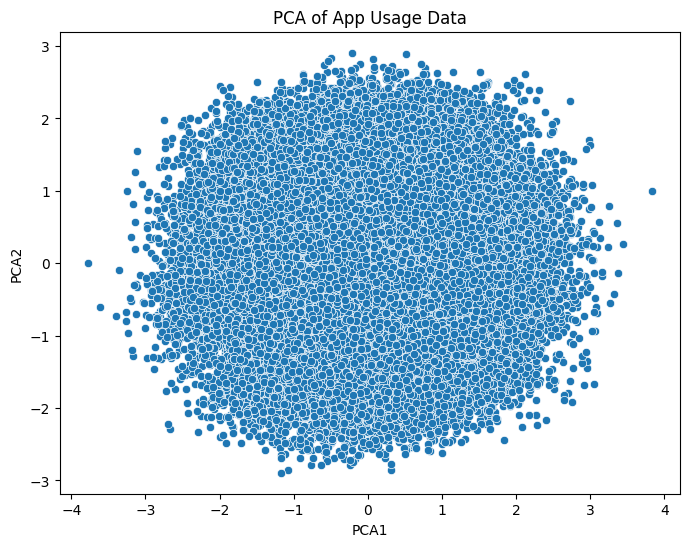

In [10]:
# 10. Visualize the PCA result
plot_pca(pca_df)  # Plot the PCA result (scatter plot)
